# Linear Regression from scratch

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data

In [2]:
data = pd.read_csv("stockprice.csv")
data.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,30-December-2022,1960.0,1970.0,1919.36,1930.62,1935.920455,88,23,170361.0,76.0,86.36,50.64,-29.38
1,29-December-2022,1930.0,1950.0,1911.00,1950.00,1913.594203,138,21,264076.0,123.0,89.13,39.00,20.00
2,28-December-2022,1930.0,1948.5,1925.00,1948.50,1940.387097,31,14,60152.0,25.0,80.65,23.50,18.50
3,27-December-2022,1929.5,1929.5,1914.13,1927.00,1925.784615,65,25,125176.0,53.0,81.54,15.37,-2.50
4,26-December-2022,1900.0,1920.0,1898.60,1919.40,1913.166667,48,23,91832.0,29.0,60.42,21.40,19.40


In [3]:
data = data.select_dtypes(include=["int64", "int32", "float64", "float32"])

In [4]:
data.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.976145,0.986060,0.970256,0.983629,-0.018509,-0.096177,-0.008196,-0.008976,0.095788,-0.008075,0.003905
High Price,0.976145,1.000000,0.971236,0.986719,0.987974,-0.011976,-0.071962,-0.001527,-0.003070,0.111330,0.153252,0.167428
Low Price,0.986060,0.971236,1.000000,0.979672,0.988442,-0.042437,-0.178185,-0.031669,-0.030155,0.081643,-0.086464,0.098617
Close Price,0.970256,0.986719,0.979672,1.000000,0.989935,-0.029341,-0.139223,-0.018640,-0.017234,0.103168,0.062676,0.245869
WAP,0.983629,0.987974,0.988442,0.989935,1.000000,-0.044104,-0.145654,-0.033388,-0.033009,0.094455,0.031533,0.150749
No.of Shares,-0.018509,-0.011976,-0.042437,-0.029341,-0.044104,1.000000,0.698734,0.999871,0.999133,0.151037,0.126004,-0.047092
No. of Trades,-0.096177,-0.071962,-0.178185,-0.139223,-0.145654,0.698734,1.000000,0.694928,0.689353,0.147348,0.438384,-0.190009
Total Turnover (Rs.),-0.008196,-0.001527,-0.031669,-0.018640,-0.033388,0.999871,0.694928,1.000000,0.999275,0.149885,0.125035,-0.044181
Deliverable Quantity,-0.008976,-0.003070,-0.030155,-0.017234,-0.033009,0.999133,0.689353,0.999275,1.000000,0.160316,0.112239,-0.035174
% Deli. Qty to Traded Qty,0.095788,0.111330,0.081643,0.103168,0.094455,0.151037,0.147348,0.149885,0.160316,1.000000,0.128148,0.042864


## Data Visualization

Text(0, 0.5, 'Close Price')

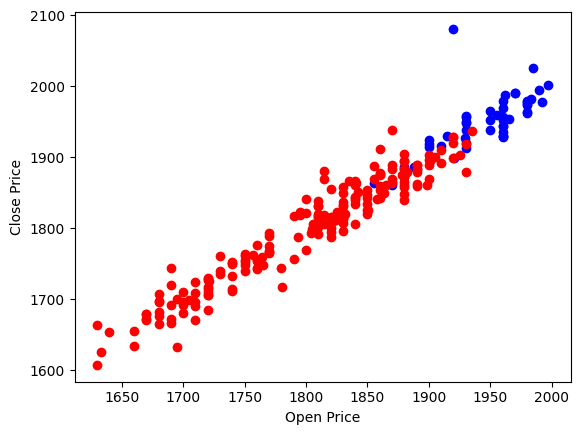

In [5]:
n = 50
x_train, y_train = np.array(data["Open Price"][:n]), np.array(data["Close Price"][:n])
x_test, y_test = np.array(data["Open Price"][n:]), np.array(data["Close Price"][n:])

plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.xlabel("Open Price")
plt.ylabel("Close Price")

## Gradient Descent

In [6]:
def gradient_descent(x, y, w, b, N, lr, iterations=10000):
    plt_mse = np.array([])
    for _ in range(iterations):
        y_pred = np.dot(w, x) + b

        mse = np.sum(np.square(y_pred - y)) / N
        plt_mse = np.append(plt_mse, np.array(mse))
        
        dw = np.sum(2 * np.dot(x, (y_pred - y))) / N
        db = np.sum(2 * (y_pred - y)) / N
        
        w = w - lr * dw
        b = b - lr * db
        
    return w, b, plt_mse

## Visualizing MSE vs iterations

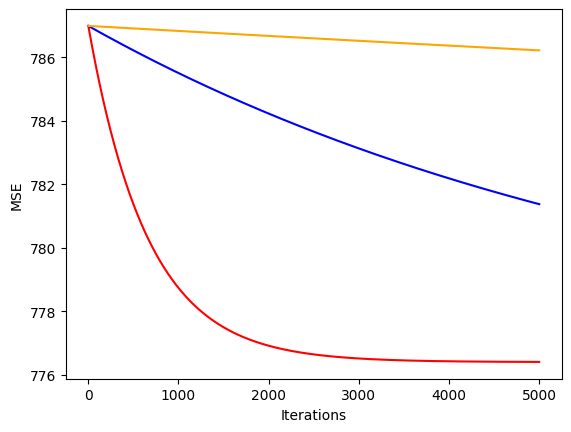

In [7]:
optimums = [[1e-10, "red"], [1e-11, "blue"], [1e-12, "orange"]]
w_items, b_items = [], []
plt.xlabel("Iterations"), plt.ylabel("MSE")
for item in optimums:
    num = 5000
    w, b, plt_mse = gradient_descent(x_train, y_train, 1, 1, n, item[0])
    w_items.append(w), b_items.append(b)
    iters = np.arange(1, len(plt_mse)+1)
    plt.plot(iters[:num], plt_mse[:num], color=item[1])

## Predictions

(Text(0.5, 0, 'Open Price'), Text(0, 0.5, 'Close Price'))

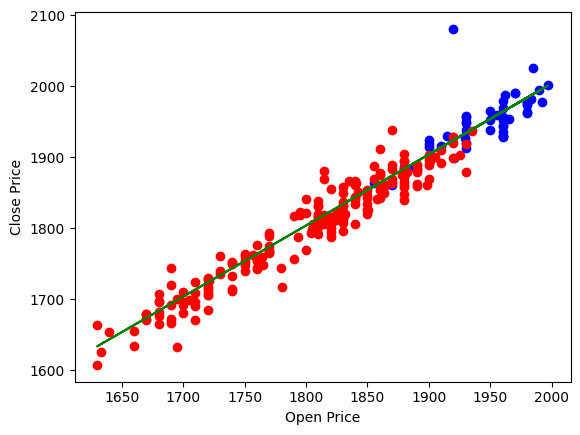

In [8]:
w, b = w_items[0], b_items[0]
y_pred = np.dot(x_train, w) + b
plt.plot(x_train, y_pred, color="green")
y_pred = np.dot(x_test, w) + b
plt.plot(x_test, y_pred, color="green")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.xlabel("Open Price"), plt.ylabel("Close Price")